# Lesson 23: Meteorite Landings - Count Plots


|Particulars|Description|
|-|-|
|**Topics Covered**|Count Plots|
||Horizontal Bars in Count Plot|
||The `hue` Parameter|
|||
|**Lesson Description**|In this class, a student will learn how to create a count plot using the `seaborn` module.|
|||
|**Lesson Duration**|45 minutes|
|||
|**Learning Outcomes**|Divide the DataFrame into a fixed period.|
||Create count plots for the total number of meteorites found in a year.|
||Create grouped count plots based on the `nametype` and `fall` categories for the total number of meteorites found in a year.|








---

### Teacher-Student Tasks

In the previous classes, we learned how to create a cartogram. In this class, we will learn how to create a count plot.

A count plot is simply a type of bar graph that presents the number of occurrences of a value in a visual format. It helps in visualising the variation of values for a particular feature. E.g., if you want to see graphically whether the number of meteorites falling over the years increasing or decreasing year-on-year basis, then you can choose to create a count plot. They are very easy to create. Let's get create a few count plots to get a better understanding.

Let's quickly rush through the activities we covered in the previous class and begin this class from **Task 1: Count Plots** section.



---

#### Recap

Dataset Link (don't click on it):

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


**Dataset Credits:** https://www.kaggle.com/nasa/meteorite-landings


In [ ]:
# Below are the activities that have been covered in the previous class.
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

met_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame. 
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


---

#### Task 1: Count Plots

Now let's make a count plot for all the years after 1990 to see the variation in the number of meteorites observed over the years. For this, we need to create a DataFrame for all the meteorites observed (`Fell` & `Found`) after 1990:

In [ ]:
# S1.1: Create a DataFrame called 'met_after_1990_df' and store data for the meteorites discovered after 1990.
met_after_1990_df = correct_lat_long_df[correct_lat_long_df['year'] > 1990]
met_after_1990_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001,13.66033,28.96000,"(13.660330, 28.960000)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002,45.82133,6.01533,"(45.821330, 6.015330)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008,20.74575,32.41275,"(20.745750, 32.412750)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009,31.80500,-97.01000,"(31.805000, -97.010000)"
70,Ban Rong Du,4934,Valid,"Iron, ungrouped",16700.0,Fell,1993,16.66667,101.18333,"(16.666670, 101.183330)"
...,...,...,...,...,...,...,...,...,...,...
45697,Zapaliname,30392,Valid,"Iron, IAB-MG",85000.0,Found,1998,25.00944,-100.75000,"(25.009440, -100.750000)"
45701,Zegdou,30398,Valid,H3,6700.0,Found,1998,29.75000,-4.50000,"(29.750000, -4.500000)"
45702,Zelfana,31353,Valid,L5,1058.0,Found,2002,32.15833,4.63333,"(32.158330, 4.633330)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.783330, 8.966670)"


So there are 16,503 meteorites that were observed (`Fell & Found`) after 1990. Now, let's create a count plot for this DataFrame.

To create a count plot, we will use the `countplot()` function which exists in the `seaborn` module. It takes two inputs. The first input is the axis on which the values are to be plotted and the second input is the source of the data, i.e., the DataFrame containing those values. Here, we will plot the `year` values on the x-axis:

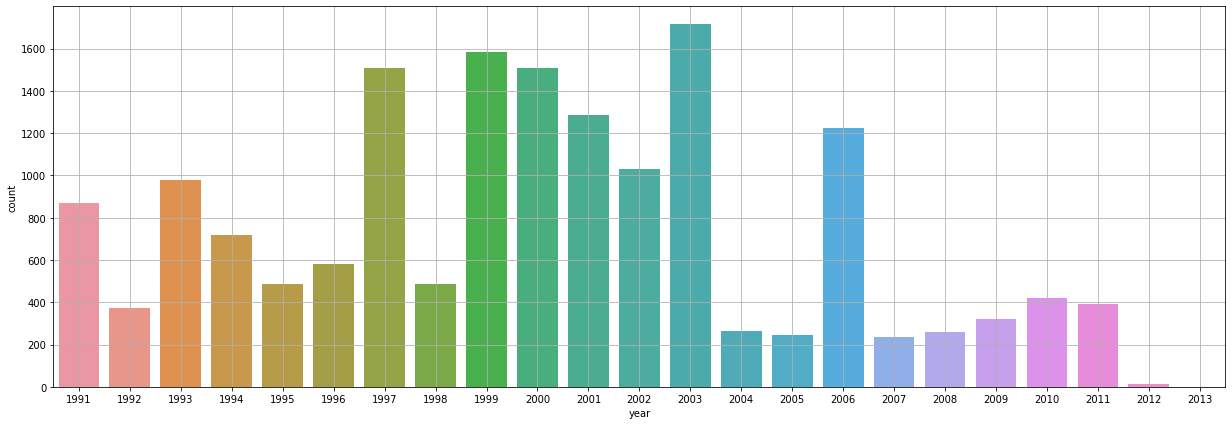

In [ ]:
# S1.2: Create a count plot for the 'year' values in the 'met_after_1990_df' DataFrame on the x-axis.
import seaborn as sns

plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_after_1990_df)
plt.grid()
plt.show()





So according to the above count plot, after the years 1990 (exclusive), the number of meteorites falling has been increasing and decreasing non-periodically. In other words, there appears no fixed pattern in the number of falls of meteorites.

Most numbers of the meteorites were observed in the year 2003. Thereafter, the number of meteorites observed dropped.


---

#### Task 2: Horizontal Bars in Count Plot

We can also change the orientation of a count plot by plotting it horizontally. In other words, we can plot the year values on the y-axis by replacing `x` with `y` in the `countplot()` function:

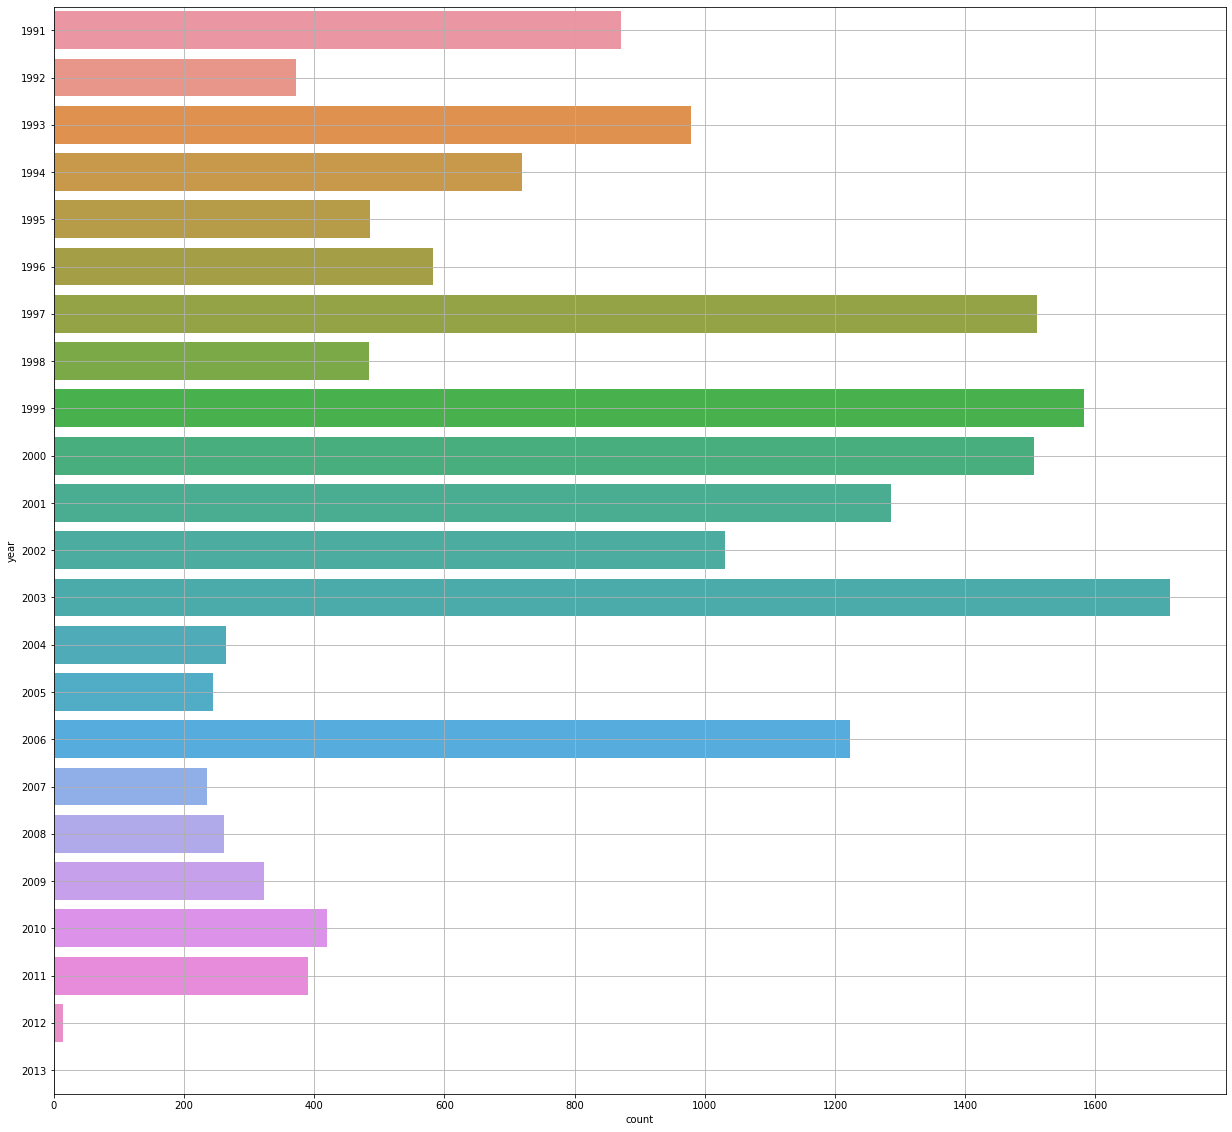

In [ ]:
# S2.1: Create a count plot for the 'year' values in the 'met_after_1990_df' DataFrame on the y-axis.
plt.figure(figsize=(21,20))
sns.countplot(y='year',data=met_after_1990_df)
plt.grid()
plt.show()

As you can see, we have printed the `year` count values on the y-axis. It is entirely up to you to choose the axis. 

---

#### Task 3: The `hue` Parameter

We can split the count bars based on a category in a count plot. E.g., 
we can split the count bars to show the following:

- The number of meteorites that fell but were not found in a year.

- The number of meteorites that fell and were found in a year.

To split the count bars based on a category, use the `hue` parameter: 

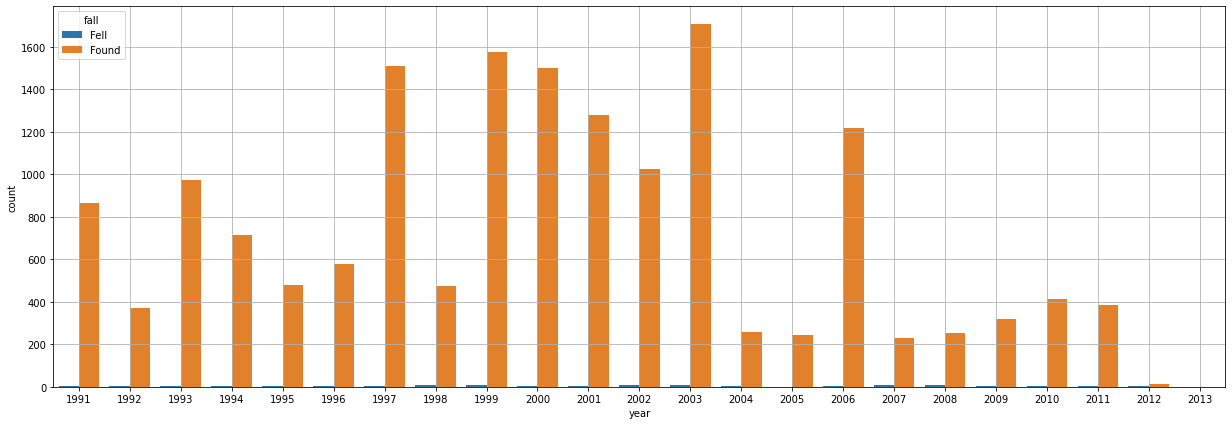

In [ ]:
# S3.1: Split the count bar for each meteorite counts for a year into the 'Fell' bar and the 'Found' bar.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_after_1990_df,hue='fall')
plt.grid()
plt.show()

**Note:** Zoom out the above output to see the blue bars clearly.

As you can see, we have divided the count bars into the count of `Fell` and the count of `Found` bars for a year. The blue coloured bars represent the count of the meteorites which fell but were not found in a year whereas the orange coloured bars represent the count of the meteorites which fell but were found in a year. The `Fell` values are very low in comparison to the `Found` values. Hence, the blue coloured bars are very short compared to the orange coloured bars.

Similarly, we can also divide the count bars based on the `nametype` category:

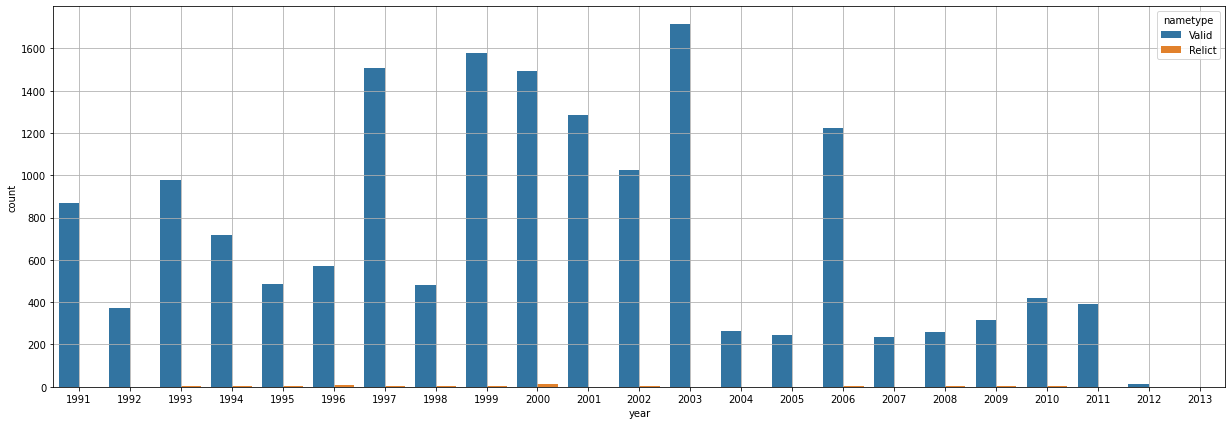

In [ ]:
# S3.2: Split the count bar for each meteorite counts for a year into the 'Valid' bar and the 'Relict' bar.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_after_1990_df,hue='nametype')
plt.grid()
plt.show()

As you can see, we have divided the count bars into the count of `Valid` and the count of `Relict` bars for a year. The blue coloured bars represent the count of the meteorites that were found in a good condition in a year whereas the orange coloured bars represent the count of the meteorites that were found in a withered condition in a year. The `Relict` values are very low in comparison to the `Valid` values. Hence, the orange coloured bars are very short compared to the blue coloured bars.

Now, let's create a count plot for the meteorites observed between the years 1961 to 1990 (both inclusive):

In [ ]:
# S3.3: Create a DataFrame for the years between 1961 and 1990.
met_1961_1990_df = correct_lat_long_df[(correct_lat_long_df['year'] > 1960) & (correct_lat_long_df['year'] < 1991) ]
met_1961_1990_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)"
10,Aioun el Atrouss,423,Valid,Diogenite-pm,1000.0,Fell,1974,16.39806,-9.57028,"(16.398060, -9.570280)"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981,39.91667,42.81667,"(39.916670, 42.816670)"
29,Allende,2278,Valid,CV3,2000000.0,Fell,1969,26.96667,-105.31667,"(26.966670, -105.316670)"
31,Alta'ameem,2284,Valid,LL5,6000.0,Fell,1977,35.27333,44.21556,"(35.273330, 44.215560)"
...,...,...,...,...,...,...,...,...,...,...
45708,Zhigansk,30405,Valid,"Iron, IIIAB",900000.0,Found,1966,68.00000,128.30000,"(68.000000, 128.300000)"
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981,31.20000,112.50000,"(31.200000, 112.500000)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"


So, there are 13,631 meteorites that were observed between 1961 to 1990 (both inclusive). Let's create a count plot for these years:

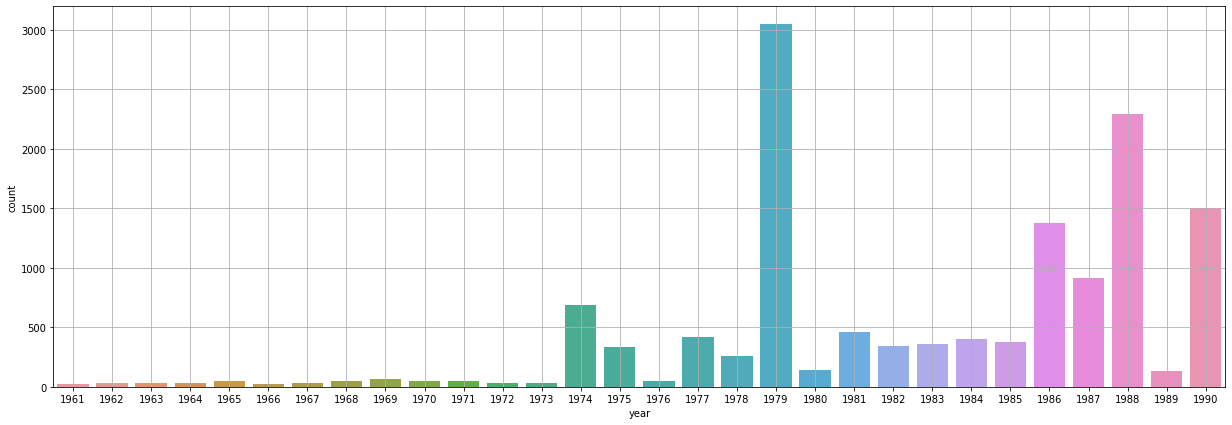

In [ ]:
# S3.4: Create a count plot for the 'year' column in the 'met_1961_1990_df' DataFrame.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_1961_1990_df)
plt.grid()
plt.show()

As you can see, the number of meteorites fallen on Earth has started increasing since 1974. Before 1974, the number of meteorites fallen was consistently less than 500. This could also possibly mean that till 1974, we did not have the capacity (or technology) to precisely monitor the fall of the meteorites.

The most number of meteorites were observed in the year 1979. Now, let's split the count bar for each year into two count bars based on the `fall` category:

---





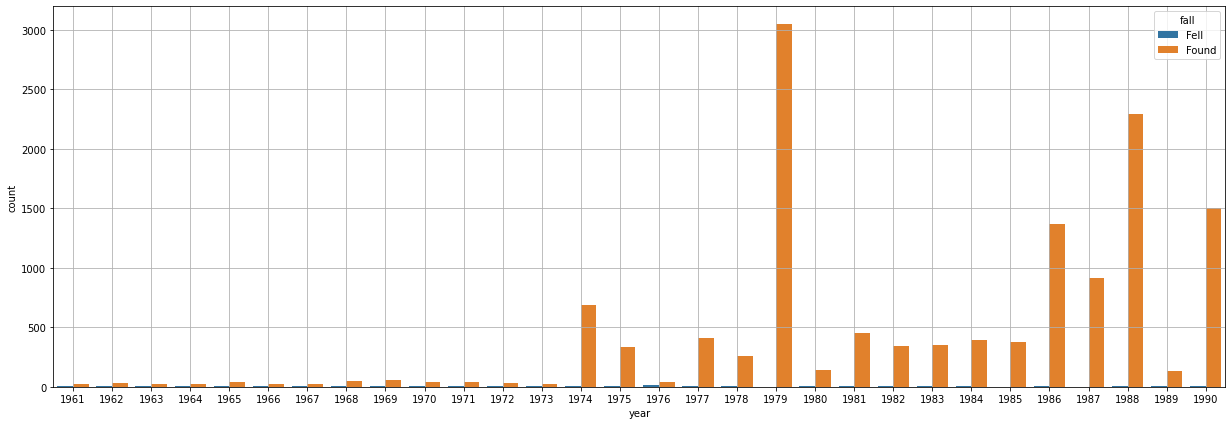

In [ ]:
# S3.5: Create a count plot for the 'year' column in the 'met_1961_1990_df' DataFrame with 'fall' as the hue parameter.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_1961_1990_df,hue='fall')
plt.grid()
plt.show()

Again, the `Found` meteorites are large in numbers for each year.

Now, let's split the count bars into two count bars based on the `nametype` category:


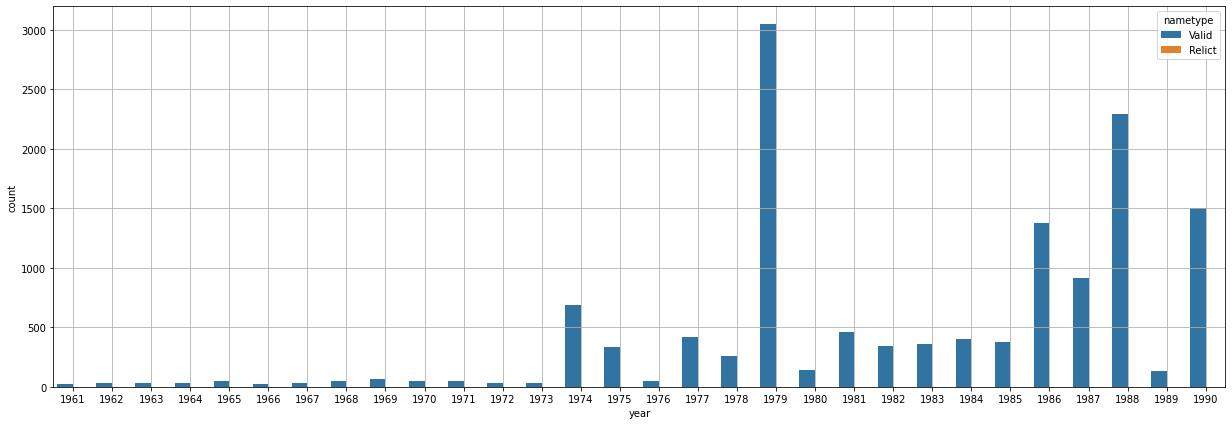

In [ ]:
# S3.6: Create a count plot for the 'year' column in the 'met_1961_1990_df' DataFrame with 'nametype' as the hue parameter.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_1961_1990_df,hue='nametype')
plt.grid()
plt.show()

Again, the `Valid` meteorites are large in numbers for each year.

Let's create another count plot for the meteorites observed between the years 1921 to 1960 (both inclusive):

In [ ]:
# S3.7: Create a DataFrame for the years between 1921 to 1960 (both inclusive).
met_1921_1960_df = correct_lat_long_df[(correct_lat_long_df['year'] >= 1921) & (correct_lat_long_df['year'] <= 1960)]
met_1921_1960_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949,44.83333,95.16667,"(44.833330, 95.166670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930,-31.60000,-65.23333,"(-31.600000, -65.233330)"
11,Aïr,424,Valid,L6,24000.0,Fell,1925,19.08333,8.38333,"(19.083330, 8.383330)"
...,...,...,...,...,...,...,...,...,...,...
45690,Yudoma,30376,Valid,"Iron, IVA",7600.0,Found,1946,60.00000,140.00000,"(60.000000, 140.000000)"
45698,Zapata County,30393,Valid,Iron,29.6,Found,1930,27.00000,-99.00000,"(27.000000, -99.000000)"
45703,Zenda,30400,Valid,"Iron, IAB complex",3700.0,Found,1955,42.51333,-88.48944,"(42.513330, -88.489440)"
45706,Zerkaly,31354,Valid,H5,16000.0,Found,1956,52.13333,81.96667,"(52.133330, 81.966670)"


So, there are 876 meteorites which are observed during the years 1921 to 1960. Let's create a count plot for this period:

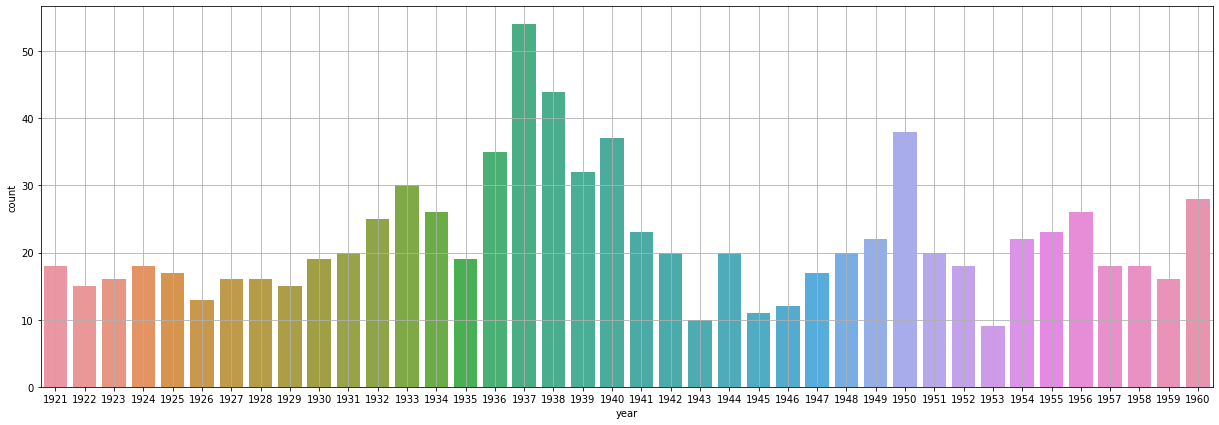

In [ ]:
# S3.8: Create a count plot for the 'year' column in the 'met_1921_1960_df' DataFrame.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_1921_1960_df)
plt.grid()
plt.show()

Again, there is no fixed pattern in the number of fallen meteorites between 1921 and 1960.

In the period 1921 to 1960, most numbers of meteorites were observed in the year 1937 but they all are less than 100 which is not so significant compared to the meteorites observed in the late 1900s and 2000s.

Now, let's split the count bars into two count bars based on the `fall` category:


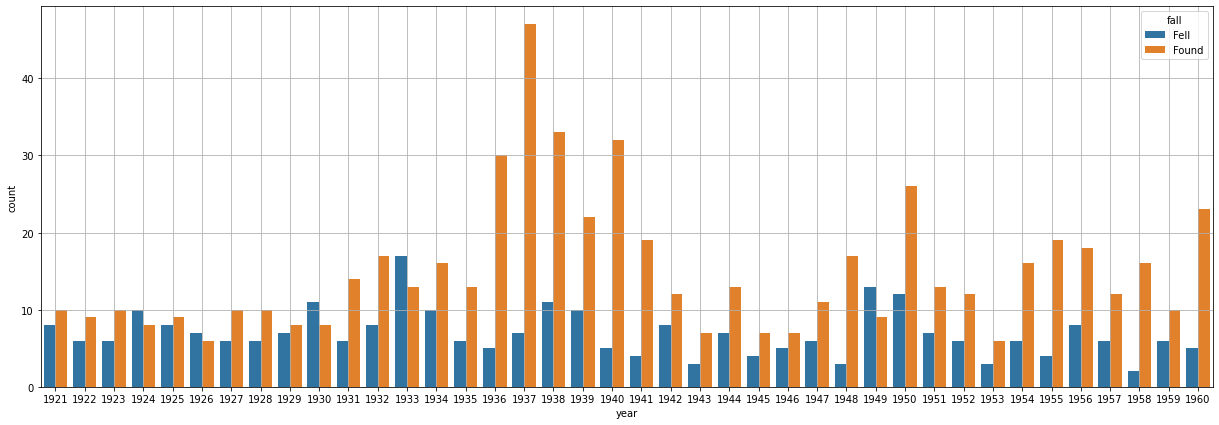

In [ ]:
# S3.9: Create a count plot for the 'year' column in the 'met_1921_1960_df' DataFrame with 'fall' as the hue parameter.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_1921_1960_df,hue='fall')
plt.grid()
plt.show()

Between 1921 and 1960, the difference between the number of `Fell` meteorites and `Found` meteorites for every year is not huge unlike between 1961 and 1990.

Now, let's split the count bars into two count bars based on the `nametype` category:


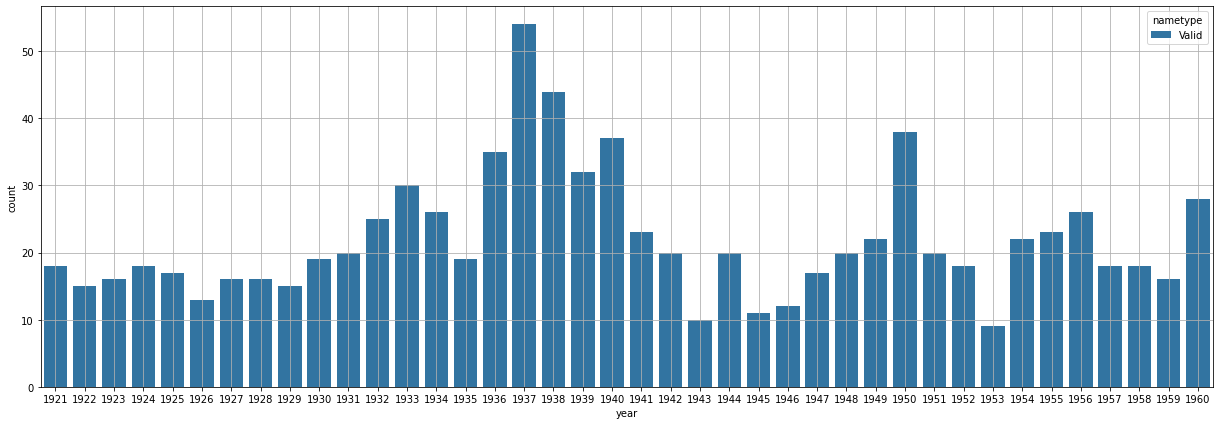

In [ ]:
# S3.10: Create a count plot for the 'year' column in the 'met_1921_1960_df' DataFrame with 'nametype' as the hue parameter.
plt.figure(figsize=(21,7))
sns.countplot(x='year',data=met_1921_1960_df,hue='nametype')
plt.grid()
plt.show()

So, there were no withered meteorites between 1921 to 1960. This could also mean that we did not have the capacity (or technology) to find the withered meteorites between 1921 and 1960.

Additionally, it seems that as we go in the past, the number of meteorites observed decreases. 

Let's create a DataFrame for the meteorites observed in all the years on or before 1920 and then use the `value_counts()` function to count the number of meteorites observed.

In [ ]:
# S3.11: Create a DataFrame for the meteorites observed before 1921.
before_1921_df = correct_lat_long_df[correct_lat_long_df['year'] < 1921]
before_1921_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775000, 6.083330)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919,32.10000,71.80000,"(32.100000, 71.800000)"
7,Agen,392,Valid,H5,30000.0,Fell,1814,44.21667,0.61667,"(44.216670, 0.616670)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920,-30.86667,-64.55000,"(-30.866670, -64.550000)"
...,...,...,...,...,...,...,...,...,...,...
45683,Youanmi,30373,Valid,"Iron, IIIAB",118400.0,Found,1917,-29.50000,118.75000,"(-29.500000, 118.750000)"
45684,Youndegin,30374,Valid,"Iron, IAB-MG",3800000.0,Found,1884,-32.10000,117.71667,"(-32.100000, 117.716670)"
45686,Ysleta,30375,Valid,"Iron, ungrouped",140700.0,Found,1914,31.65000,-106.18333,"(31.650000, -106.183330)"
45691,Zacatecas (1792),30381,Valid,"Iron, ungrouped",1000000.0,Found,1792,22.81667,-102.56667,"(22.816670, -102.566670)"


So, a total of 1026 meteorites were observed from the years 860 to 1920 (both inclusive). That's even less than 1 meteorite observed per year on average because

$$\frac{\text{Number of meteorites observed}}{\text{Number of years}} = \left(\frac{1026}{1920 - 860 + 1} \right) = \frac{1026}{1060 + 1}$$ 

$$\Rightarrow \frac{1026}{1061} < 1$$

There are 
$1061$ 
years between 860 and 1920 including both of them.

**Note:** To count the number of natural numbers between two natural numbers 
$a$ and $b$ where $a < b$ including both of them, use the $(b - a + 1)$
mathematical expression.

Let's create a count plot for the meteorites observed before 1921:

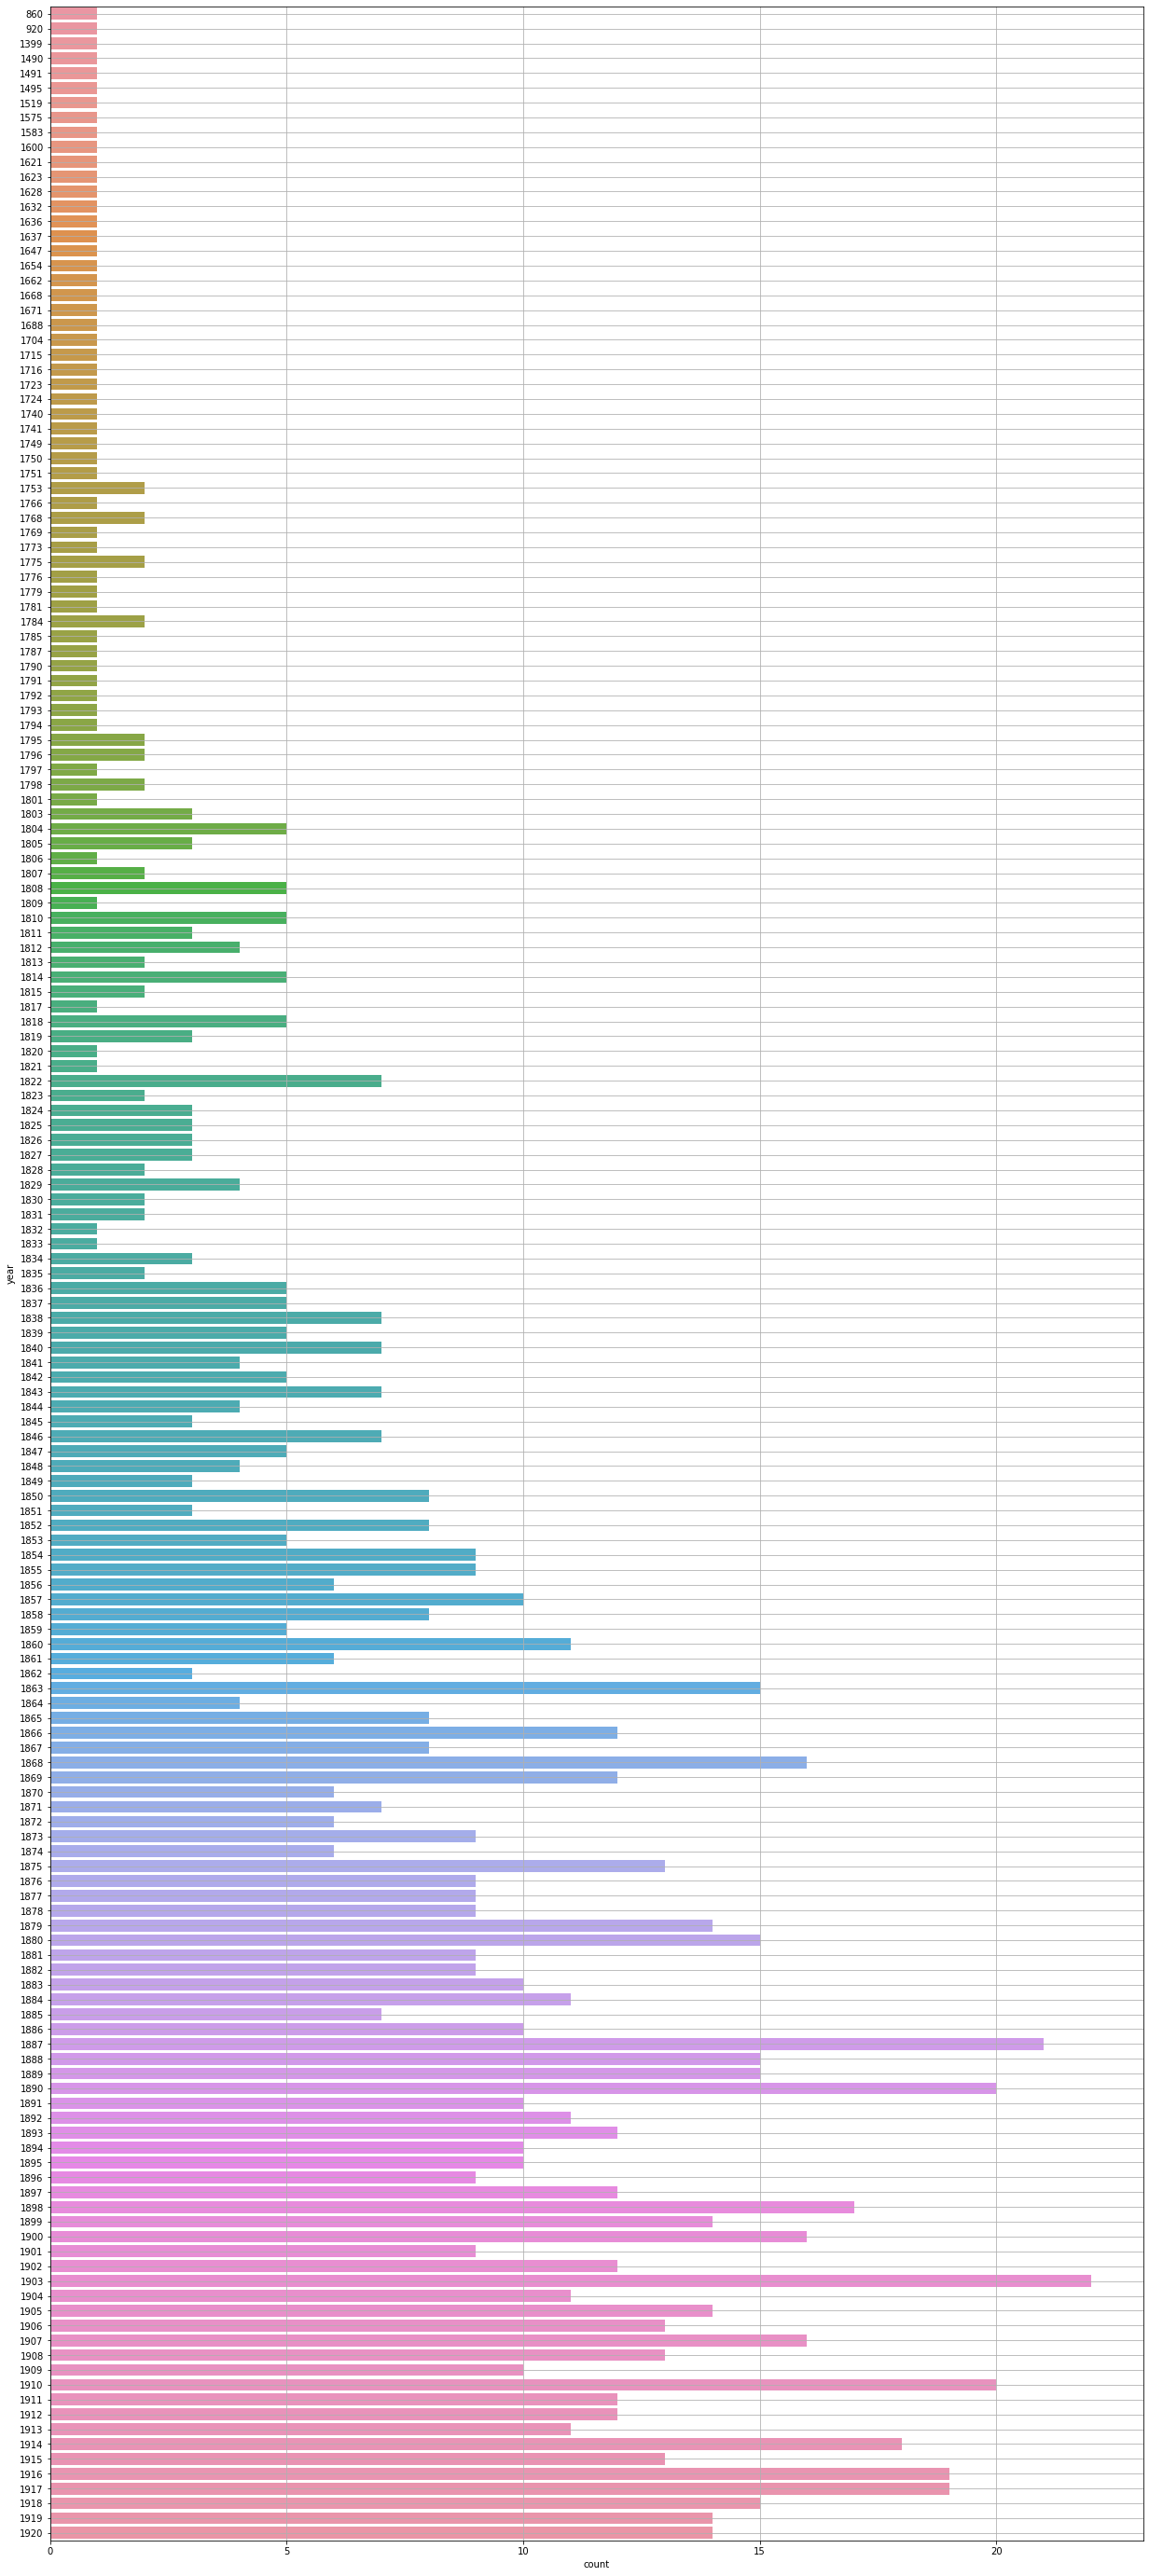

In [ ]:
# S3.12: Create a count plot for the meteorites observed before 1921.
plt.figure(figsize=(21,50))
sns.countplot(y='year',data=before_1921_df)
plt.grid()
plt.show()

As we can see, the number of meteorites observed before 1921 drops significantly even less than 5.

So, the count plots helps us in visualising the data and exploring the trend (if there exists one). Also, creating a count plot is a very straight forward task. In the next class, we will learn how to create histograms.

---